In [13]:
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}
library("pheatmap")
results="/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL6"
previousResults="/sharedFolder/Results/Hotspot/Revision1/FULL/6/"
library("ggVennDiagram");
library("ggplot2")
library("vioplot")
library(eulerr)


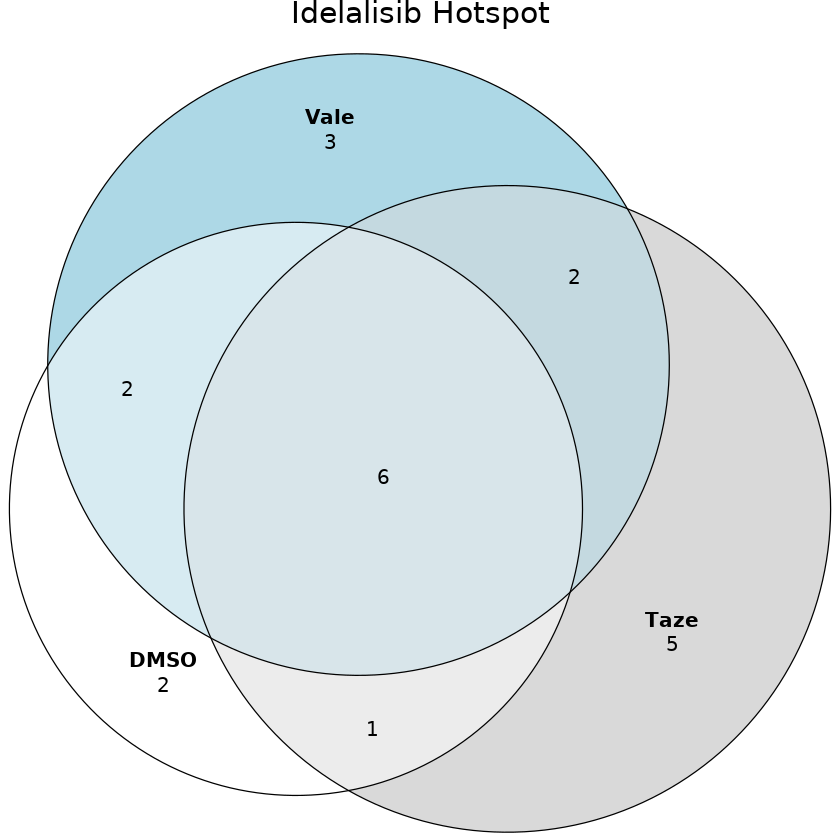

In [14]:
#Venn diagram plot. Check how many hotspot are in common
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
types=c("Idelalisib")
conditions=c("DMSO","Taze","Vale")
for(j in types){
subBase=Database[grep(j,Database[,6]),]
x <- list()
count=1
for(i in conditions){
x[[count]]=subBase[grep(i,subBase[,6]),7]
count=count+1
}
names(x)=conditions
system("echo yeah")
}
jjj=(unlist(x))
j2=x 
fit1 <- euler(c("DMSO" = length(setdiff(setdiff(j2$DMSO,j2$Taze),j2$Vale)), "Taze" = length(setdiff(setdiff(j2$Taze,j2$DMSO),j2$Vale)), "Vale" = length(setdiff(setdiff(j2$Vale,j2$Taze),j2$DMSO)),"DMSO&Taze&Vale"=length(intersect(intersect(j2$DMSO,j2$Taze),j2$Vale)),"DMSO&Taze"=length(setdiff(intersect(j2$DMSO,j2$Taze),j2$Vale)),"DMSO&Vale"=length(setdiff(intersect(j2$DMSO,j2$Vale),j2$Taze)),"Taze&Vale"=length(setdiff(intersect(j2$Taze,j2$Vale),j2$DMSO)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")


Warning message in dir.create(res2):
“'/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL6HotspotIDList' already exists”


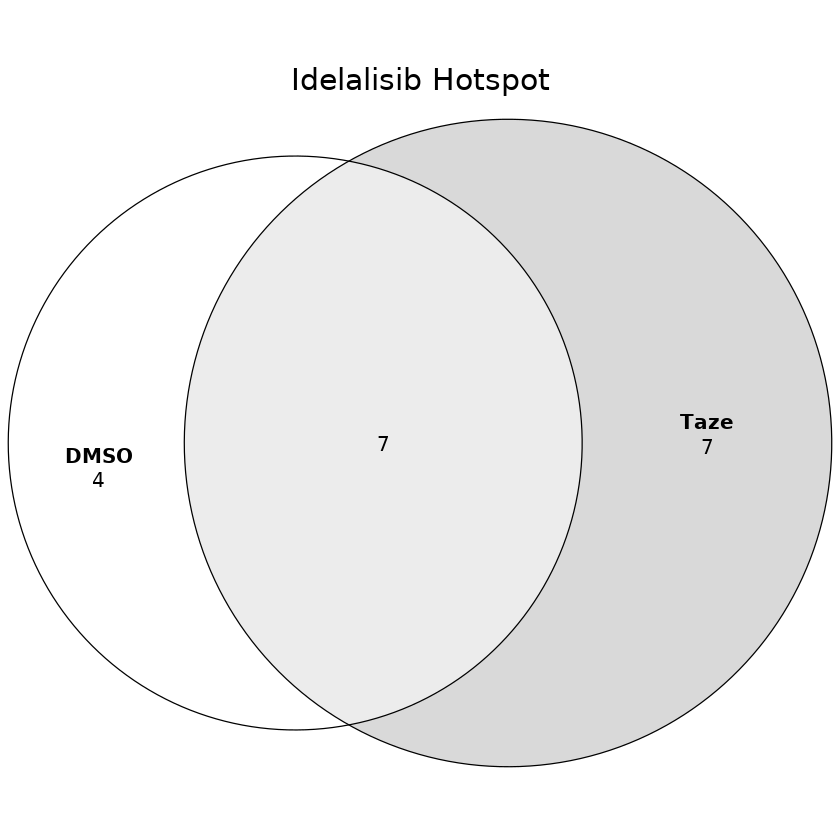

In [15]:
DMSOSpec=setdiff(setdiff(x$DMSO,x$Vale),x$Taze)
TazeSpec=setdiff(setdiff(x$Taze,x$DMSO),x$Vale)
ValeSpec=setdiff(setdiff(x$Vale,x$DMSO),x$Taze)
TazVale=setdiff(intersect(x$Taze,x$Vale),x$DMSO)
TazDMSO=setdiff(intersect(x$Taze,x$DMSO),x$Vale)
DMSOVale=setdiff(intersect(x$ Vale,x$DMSO),x$Taze)
common=intersect(intersect(x$ Vale,x$DMSO),x$Taze)
fit1 <- euler(c("DMSO" = length(setdiff(j2$DMSO,j2$Taze)), "Taze" = length(setdiff(j2$Taze,j2$DMSO)),"DMSO&Taze"=length(intersect(j2$DMSO,j2$Taze)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")
res2=paste(results,"HotspotIDList/",sep="")
dir.create(res2)
write.table(unique(union(j2$Taze,j2$DMSO)),paste(res2,"/TazeFULL.csv",sep=""),col.names=FALSE,row.names=FALSE)
write.table(unique(union(j2$Vale,j2$DMSO)),paste(res2,"/ValeFULL.csv",sep=""),col.names=FALSE,row.names=FALSE)
write.table(intersect(j2$DMSO,j2$Taze),paste(res2,"/Tazecommon.csv",sep=""),col.names=FALSE,row.names=FALSE)
write.table(intersect(j2$DMSO,j2$Vale),paste(res2,"/Valecommon.csv",sep=""),col.names=FALSE,row.names=FALSE)

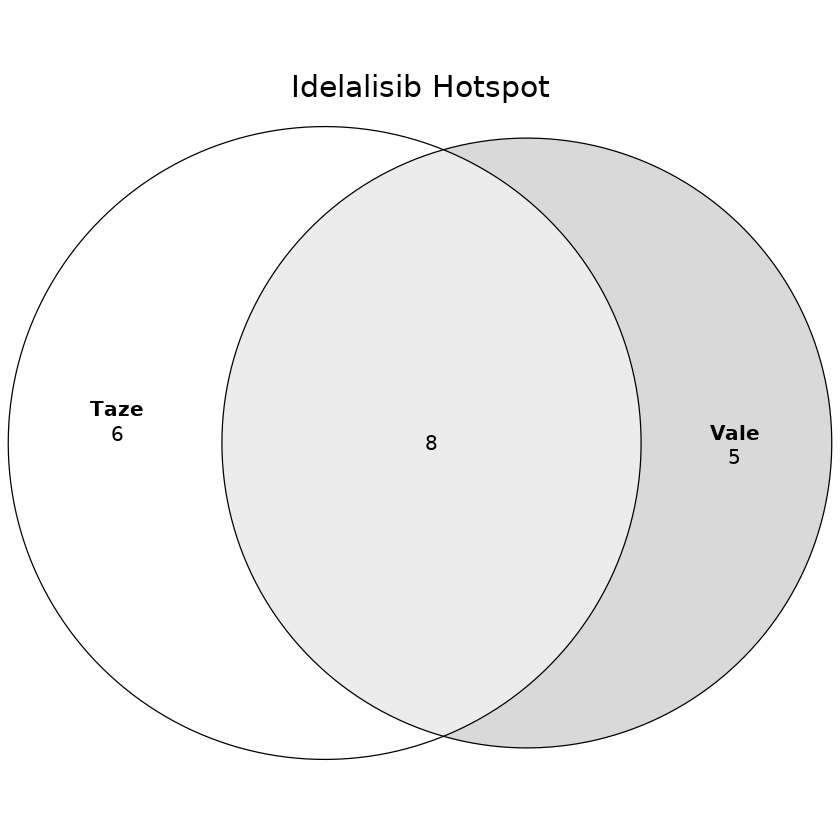

In [16]:
fit1 <- euler(c("Taze" = length(setdiff(j2$Taze,j2$Vale)), "Vale" = length(setdiff(j2$Vale,j2$Taze)),"Taze&Vale"=length(intersect(j2$Vale,j2$Taze)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")

In [17]:
length(setdiff(j2$Taze,j2$Vale))

[1] 6

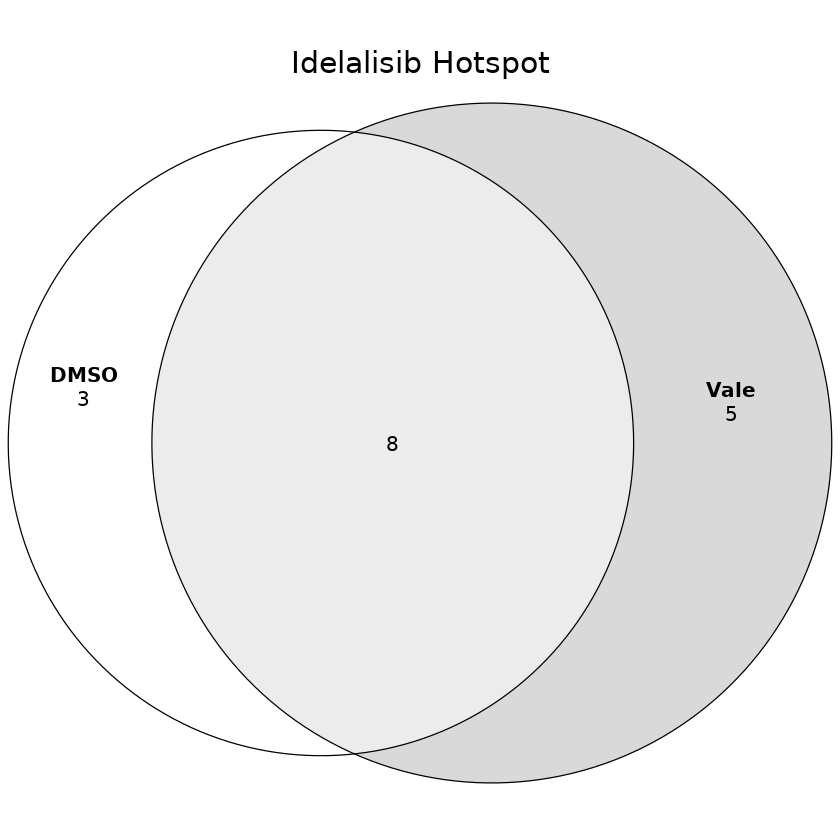

In [18]:
fit1 <- euler(c("DMSO" = length(setdiff(j2$DMSO,j2$Vale)), "Vale" = length(setdiff(j2$Vale,j2$DMSO)),"DMSO&Vale"=length(intersect(j2$DMSO,j2$Vale)) ))
plot(fit1,quantities = TRUE,main="Idelalisib Hotspot")

In [19]:
#GENERATING RPM PLOTS 
mj=list()
count=1
dir.create(paste(results,"/rpmPlot/",sep=""),recursive=TRUE)
a=as.matrix(read.table(paste(results,"rpm_hgtgtsHeatmap.csv",sep="/"),header=TRUE,row.names=1,sep=","))
temp=a[sapply(setdiff(j2$DMSO,j2$Taze),toString),c(1,2)]
if(length(temp)>2){
temp=temp[sort(temp[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp2=a[sapply(intersect(j2$DMSO,j2$Taze),toString),c(1,2)]
if(length(temp2)>2){
temp2=temp2[sort(temp2[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp3=a[sapply(setdiff(j2$Taze,j2$DMSO),toString),c(1,2)]
if(length(temp3)>2){
temp3=temp3[sort(temp3[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}

mj[[count]]=temp
count=count+1
mj[[count]]=temp2

count=count+1
mj[[count]]=temp3



count=count+1

write.table(rbind(temp,temp2,temp3),paste(results,"/rpmPlot/Ide_DMSOTaze.csv",sep=""),col.names=NA,sep=",",quote=TRUE)



temp=a[sapply(setdiff(j2$DMSO,j2$Vale),toString),c(1,3)]
if(length(temp)>2){
temp=temp[sort(temp[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp2=a[sapply(intersect(j2$DMSO,j2$Vale),toString),c(1,3)]
if(length(temp2)>2){
temp2=temp2[sort(temp2[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp3=a[sapply(setdiff(j2$Vale,j2$DMSO),toString),c(1,3)]
if(length(temp3)>2){
temp3=temp3[sort(temp3[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}


mj[[count]]=temp
count=count+1
mj[[count]]=temp2

count=count+1
mj[[count]]=temp3

count=count+1
write.table(rbind(temp,temp2,temp3),paste(results,"/rpmPlot/Ide_DMSOVale.csv",sep=""),col.names=NA,sep=",",quote=TRUE)





Warning message in dir.create(paste(results, "/rpmPlot/", sep = ""), recursive = TRUE):
“'/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL6/rpmPlot' already exists”


Warning message:
“Removed 1 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


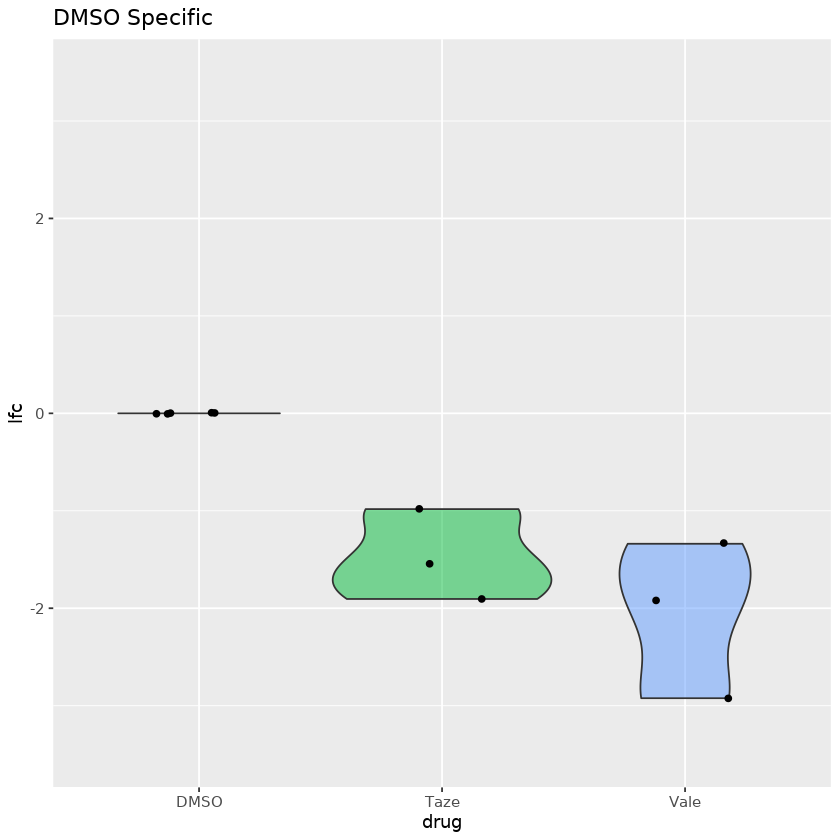

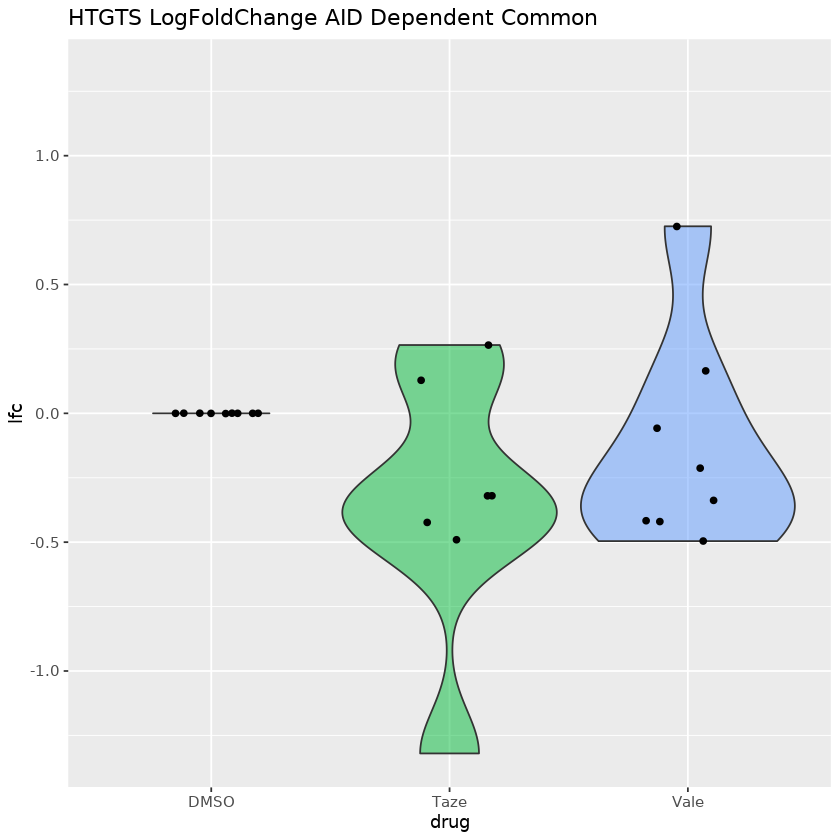

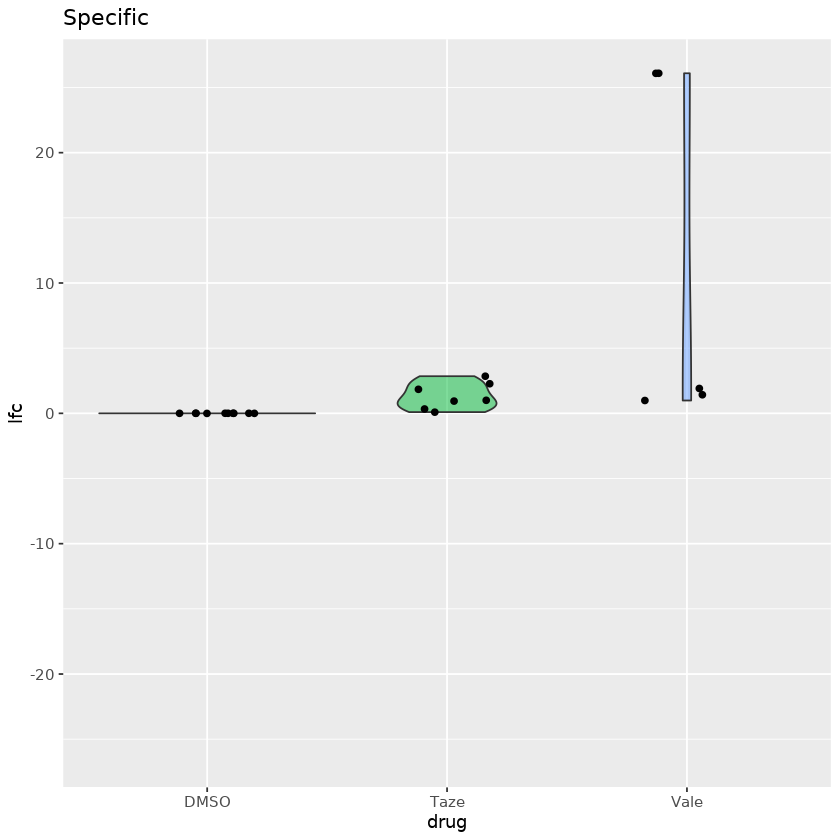

In [20]:
#Evaluating RPM log fold change, uncomment to add DMSO
nn=c("DMSO Specific","HTGTS LogFoldChange AID Dependent Common","Specific")
countnn=1
for(i in seq(count/2)){
foldChange=list()
foldChange[[1]]=log2((mj[[i]][,2]+0.000001)/(mj[[i]][,1]+0.000001))
foldChange[[2]]=log2((mj[[i+3]][,2]+0.000001)/(mj[[i+3]][,1]+0.000001))
    names(foldChange)=c(colnames(mj[[i]])[2],colnames(mj[[i+3]])[2])
    lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))
    foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(unique(c(names(foldChange[[1]]),names(foldChange[[2]])))))))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-lim,lim) + ggtitle(nn[countnn])
plot(pp)    
    countnn=countnn+1
}

Warning message:
“Removed 2 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


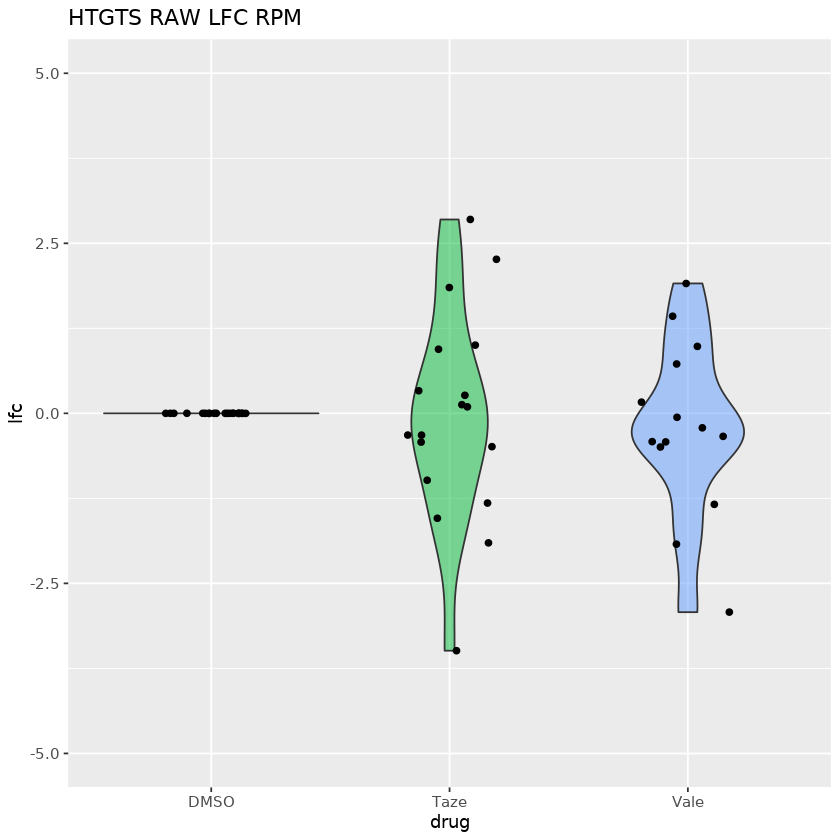

In [21]:
#FULL RAW
foldChange=list()
foldChange[[1]]=log2((rbind(mj[[1]],mj[[2]],mj[[3]])[,2]+0.000001)/(rbind(mj[[1]],mj[[2]],mj[[3]])[,1]+0.000001))
foldChange[[2]]=log2((rbind(mj[[4]],mj[[5]],mj[[6]])[,2]+0.000001)/(rbind(mj[[4]],mj[[5]],mj[[6]])[,1]+0.000001))
    names(foldChange)=c(colnames(mj[[1]])[2],colnames(mj[[4]])[2])
    lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))
    foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(unique(c(names(foldChange[[1]]),names(foldChange[[2]])))))))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-5,5) + ggtitle("HTGTS RAW LFC RPM")
plot(pp)    

In [22]:
length(unique(c((rownames(mj[[1]])),(rownames(mj[[2]])),(rownames(mj[[3]])))))

[1] 18

In [23]:
#Generate matrix for filtering rpmPlot/sortNames/dmso Taz Vale Specific and common
names(mj)=c("DMSO_spec_vsTaze","DMSO_TAZE","TazeSPec","DMSO_spec_vsVale","DMSOVale","ValeSpec")
dir.create(paste(results,"/rpmPlot/sortNames/",sep=""))
for(i in seq(length(mj))){
write.table(rownames(mj[[i]]),paste(results,"/rpmPlot/sortNames/_",i,"_",names(mj)[i],".csv",sep=""),col.names=FALSE,row.names=FALSE)
}

Warning message in dir.create(paste(results, "/rpmPlot/sortNames/", sep = "")):
“'/sharedFolder/Results/Hotspot/Revision1/Idelalisib/FULL6/rpmPlot/sortNames' already exists”


In [24]:
#Generate matrix for heatmap separated for taze vale common and dmso spec
a=as.matrix(read.table(paste(results,"rpm_hgtgtsHeatmap.csv",sep="/"),header=TRUE,row.names=1,sep=","))+0.000001
filterVale=unique(rownames(read.table(paste(results,"/rpmPlot/Ide_DMSOVale.csv",sep=""),header=TRUE,row.names=1,sep=",")))
filterVale=unlist(sapply(filterVale,FUN=function(x){toString(x)}))

filterTaze=unique(rownames(read.table(paste(results,"/rpmPlot/Ide_DMSOTaze.csv",sep=""),header=TRUE,row.names=1,sep=",")))
filterTaze=unlist(sapply(filterTaze,FUN=function(x){toString(x)}))

yo=cbind(a[filterTaze,2]/a[filterTaze,1],a[filterVale,3]/a[filterVale,1])
colnames(yo)=c("Taze","Vale")

write.table(log10(yo),paste(results,"/rpmPlot","/lfcBoxplot.txt",sep=""),sep=",",row.names=FALSE)
write.table(a[sapply(c(TazeSpec,TazVale,ValeSpec,common,TazDMSO,DMSOVale,DMSOSpec),toString),],paste(results,"rpmPlot/rpm_hgtgtsHeatmapDIVIDED.csv",sep="/"),col.names=NA,sep=",")

Warning message in cbind(a[filterTaze, 2]/a[filterTaze, 1], a[filterVale, 3]/a[filterVale, :
“number of rows of result is not a multiple of vector length (arg 2)”
